In [1]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated*", category=FutureWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/electric-vehicle-charging-patterns/ev_charging_patterns.csv


In [2]:
# Load the data
data = pd.read_csv("/kaggle/input/electric-vehicle-charging-patterns/ev_charging_patterns.csv")
data.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


# Exploring the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

# Fields and data types 🚗🔋:

This dataset offers an in-depth view of electric vehicle charging sessions, capturing various parameters that provide insights into charging behaviors, energy consumption, and user patterns.

| Parameter                                  | Description                                                                                                                                                           |
|--------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|User ID: |Unique identifier for each user.|
|Vehicle Model: |Model of the electric vehicle being charged (e.g., Tesla Model 3, Nissan Leaf).|
|Battery Capacity (kWh): |Total battery capacity of the vehicle in kilowatt-hours.|
|Charging Station ID: |Unique identifier for the charging station used.|
|Charging Station Location: |Geographic location of the charging station (e.g., New York, Los Angeles).|
|Charging Start Time: |Timestamp indicating when the charging session began.|
|Charging End Time: |Timestamp indicating when the charging session ended.|
|Energy Consumed (kWh): |Total energy consumed during the charging session, measured in kilowatt-hours.|
|Charging Duration (hours): |Total time taken to charge the vehicle, measured in hours.|
|Charging Rate (kW): |Average power delivery rate during the charging session, measured in kilowatts.|
|Charging Cost (USD): |Total cost incurred for the charging session, measured in US dollars.|
|Time of Day: |Time segment when the charging occurred (e.g., Morning, Afternoon).|
|Day of Week: |Day of the week when the charging occurred (e.g., Monday, Tuesday).|
|State of Charge (Start %): |Battery charge percentage at the start of the charging session.|
|State of Charge (End %): |Battery charge percentage at the end of the charging session.|
|Distance Driven (since last charge) (km): |Distance traveled since the last charging session, measured in kilometers.|
|Temperature (°C): |Ambient temperature during the charging session, measured in degrees Celsius.|
|Vehicle Age (years): |Age of the electric vehicle, measured in years.|
|Charger Type: |Type of charger used (e.g., Level 1, Level 2, DC Fast Charger).|
|User Type: |Classification of user based on driving habits (e.g., Commuter, Long-Distance Traveler).|

This dataset is ideal for researchers, data scientists, and analysts interested in understanding electric vehicle charging behaviors and developing predictive models related to energy consumption and user patterns.

In [4]:
# Display the dimensions of the dataset
data.shape

(1320, 20)

In [5]:
# Display descriptive statistics of the dataset
data.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [6]:
# Display columns names of the dataset
data.columns.values

array(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time',
       'Energy Consumed (kWh)', 'Charging Duration (hours)',
       'Charging Rate (kW)', 'Charging Cost (USD)', 'Time of Day',
       'Day of Week', 'State of Charge (Start %)',
       'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'], dtype=object)

In [7]:
# Renames the dataset and removes spaces for easier handling
data = data.rename(columns={
    "User ID": "UserID",
    "Vehicle Model": "VehicleModel",
    "Battery Capacity (kWh)": "BatteryCapacity_kWh",
    "Charging Station ID": "ChargingStationID",
    "Charging Station Location": "ChargingLocation",
    "Charging Start Time": "StartTime",
    "Charging End Time": "EndTime",
    "Energy Consumed (kWh)": "EnergyConsumed_kWh",
    "Charging Duration (hours)": "Duration_hours",
    "Charging Rate (kW)": "ChargingRate_kW",
    "Charging Cost (USD)": "Cost_USD",
    "Time of Day": "TimeOfDay",
    "Day of Week": "DayOfWeek",
    "State of Charge (Start %)": "StartChargePercent",
    "State of Charge (End %)": "EndChargePercent",
    "Distance Driven (since last charge) (km)": "DistanceDriven_km",
    "Temperature (°C)": "Temperature_C",
    "Vehicle Age (years)": "VehicleAge_years",
    "Charger Type": "ChargerType",
    "User Type": "UserType"
})

# Check the updated columns
data.head()

,UserID,VehicleModel,BatteryCapacity_kWh,ChargingStationID,ChargingLocation,StartTime,EndTime,EnergyConsumed_kWh,Duration_hours,ChargingRate_kW,Cost_USD,TimeOfDay,DayOfWeek,StartChargePercent,EndChargePercent,DistanceDriven_km,Temperature_C,VehicleAge_years,ChargerType,UserType
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [9]:
data.VehicleModel.value_counts()

VehicleModel
Tesla Model 3    280
Hyundai Kona     266
Nissan Leaf      260
BMW i3           258
Chevy Bolt       256
Name: count, dtype: int64

In [10]:
data.ChargingLocation.value_counts()

ChargingLocation
Los Angeles      297
San Francisco    264
Houston          262
New York         255
Chicago          242
Name: count, dtype: int64

In [12]:
data.ChargerType.value_counts()

ChargerType
Level 1            459
Level 2            431
DC Fast Charger    430
Name: count, dtype: int64

In [13]:
data.DayOfWeek.value_counts()

DayOfWeek
Saturday     205
Tuesday      200
Wednesday    197
Sunday       191
Friday       188
Monday       185
Thursday     154
Name: count, dtype: int64

In [14]:
data.TimeOfDay.value_counts()

TimeOfDay
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64

# Handling missing data

In [15]:
# Missing data
data.isnull().sum()

UserID                  0
VehicleModel            0
BatteryCapacity_kWh     0
ChargingStationID       0
ChargingLocation        0
StartTime               0
EndTime                 0
EnergyConsumed_kWh     66
Duration_hours          0
ChargingRate_kW        66
Cost_USD                0
TimeOfDay               0
DayOfWeek               0
StartChargePercent      0
EndChargePercent        0
DistanceDriven_km      66
Temperature_C           0
VehicleAge_years        0
ChargerType             0
UserType                0
dtype: int64

In [17]:
# Fill missing values
data['EnergyConsumed_kWh'].fillna(0, inplace=True)
data['ChargingRate_kW'].fillna(0, inplace=True)
data['DistanceDriven_km'].fillna(0, inplace=True)

# Verify the data
print(data.isnull().sum())

UserID                 0
VehicleModel           0
BatteryCapacity_kWh    0
ChargingStationID      0
ChargingLocation       0
StartTime              0
EndTime                0
EnergyConsumed_kWh     0
Duration_hours         0
ChargingRate_kW        0
Cost_USD               0
TimeOfDay              0
DayOfWeek              0
StartChargePercent     0
EndChargePercent       0
DistanceDriven_km      0
Temperature_C          0
VehicleAge_years       0
ChargerType            0
UserType               0
dtype: int64


# EDA (Exploratory Data Analysis)

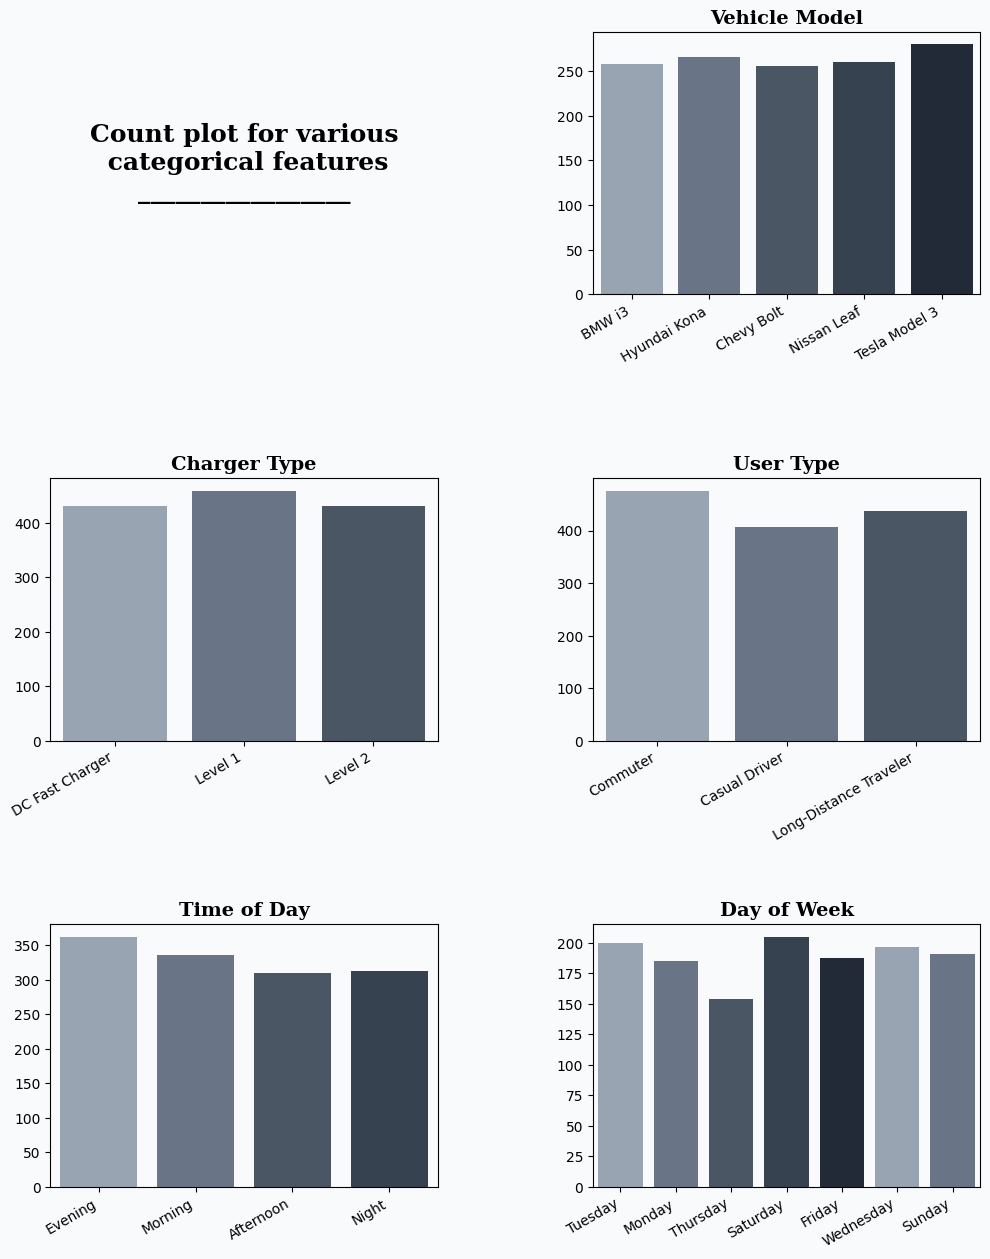

In [18]:
# Figure adjustments
fig = plt.figure(figsize=(12, 15))  
gs = fig.add_gridspec(3, 2)
# Increases space between subplots
gs.update(wspace=0.4, hspace=0.7)  

background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
fig.patch.set_facecolor(background_color)
axes = [fig.add_subplot(gs[i,j]) for i in range(3) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Title of the plot
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Count plot for various\n categorical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# Plot for each categorical feature
plot_features = ['VehicleModel', 'ChargerType', 'UserType', 'TimeOfDay', 'DayOfWeek']
titles = ["Vehicle Model", "Charger Type", "User Type", "Time of Day", "Day of Week"]

for i, feature in enumerate(plot_features):
    ax = axes[i + 1]
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    sns.countplot(ax=ax, data=data, x=feature, palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)

# Adjust and show
plt.show()

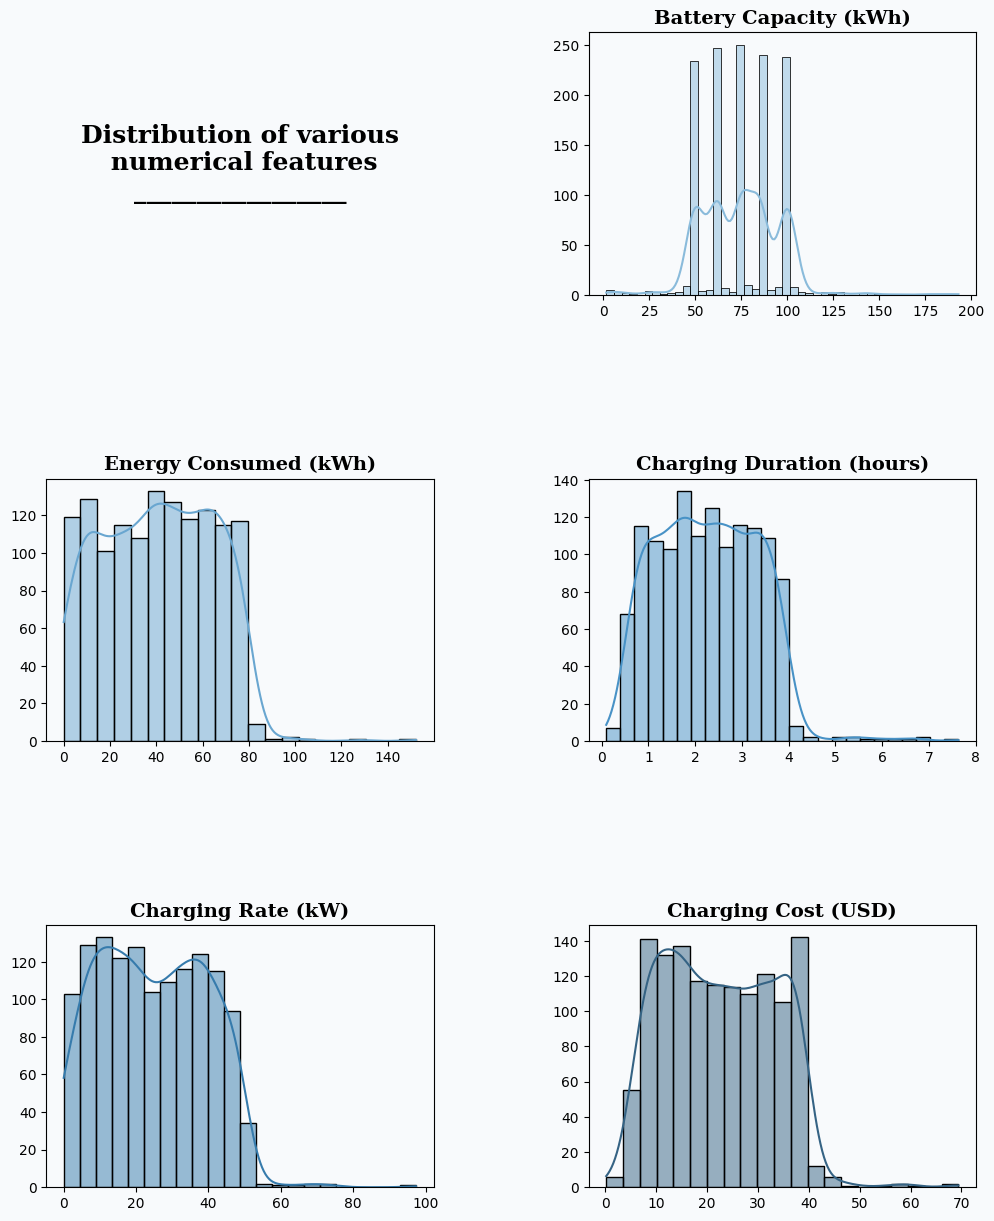

In [20]:
# Figure settings for better visualization
fig = plt.figure(figsize=(12, 15))
gs = fig.add_gridspec(3, 2)  # 3 rows and 2 columns for the grid layout (total 6 subplots)
# Increase space between subplots
gs.update(wspace=0.4, hspace=0.7)

background_color = "#f8fafc"
color_palette = sns.color_palette("Blues_d")
fig.patch.set_facecolor(background_color)

# Create the subplots (6 axes in total)
axes = [fig.add_subplot(gs[i, j]) for i in range(3) for j in range(2)]
for ax in axes:
    ax.set_facecolor(background_color)

# Main title for the entire figure
axes[0].spines["bottom"].set_visible(False)
axes[0].spines["left"].set_visible(False)
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)
axes[0].tick_params(left=False, bottom=False)
axes[0].set_xticklabels([])
axes[0].set_yticklabels([])
axes[0].text(0.5, 0.5,
             'Distribution of various\n numerical features\n_________________',
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=18, fontweight='bold',
             fontfamily='serif',
             color="#000000")

# List of numerical features to plot (ensure 5 features for remaining subplots)
plot_features = ['BatteryCapacity_kWh', 'EnergyConsumed_kWh', 'Duration_hours', 
                 'ChargingRate_kW', 'Cost_USD']
titles = ["Battery Capacity (kWh)", "Energy Consumed (kWh)", "Charging Duration (hours)",
          "Charging Rate (kW)", "Charging Cost (USD)"]

# Loop through the numerical features and create plots
for i, feature in enumerate(plot_features):
    ax = axes[i + 1]  # Start from 1 since 0 is for the title
    ax.set_title(titles[i], loc='center', fontsize=14, fontweight='bold', fontfamily="serif", color="#000000")
    # Plot histogram for each numerical feature
    sns.histplot(ax=ax, data=data, x=feature, kde=True, color=color_palette[i % len(color_palette)])
    ax.set_xlabel("")
    ax.set_ylabel("")

# Adjust and show the plot
plt.show()


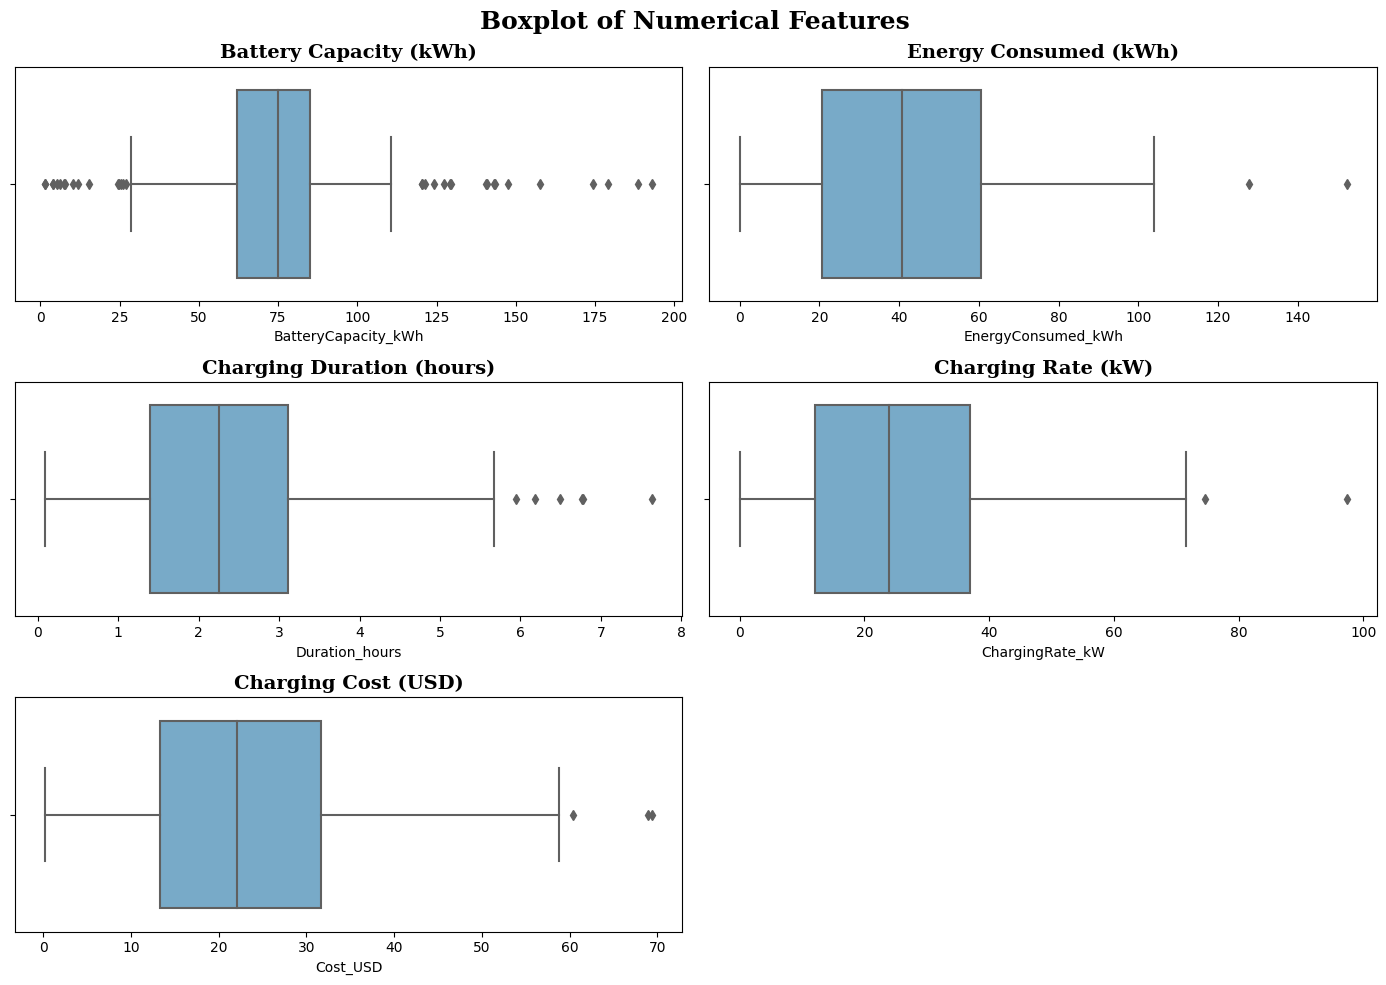

In [21]:
# 1. Boxplots for numerical features to identify outliers
plt.figure(figsize=(14, 10))
plt.suptitle('Boxplot of Numerical Features', fontsize=18, fontweight='bold', fontfamily='serif')
for i, feature in enumerate(plot_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(data=data, x=feature, palette="Blues")
    plt.title(f"{titles[i]}", fontsize=14, fontweight='bold', fontfamily='serif')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable h

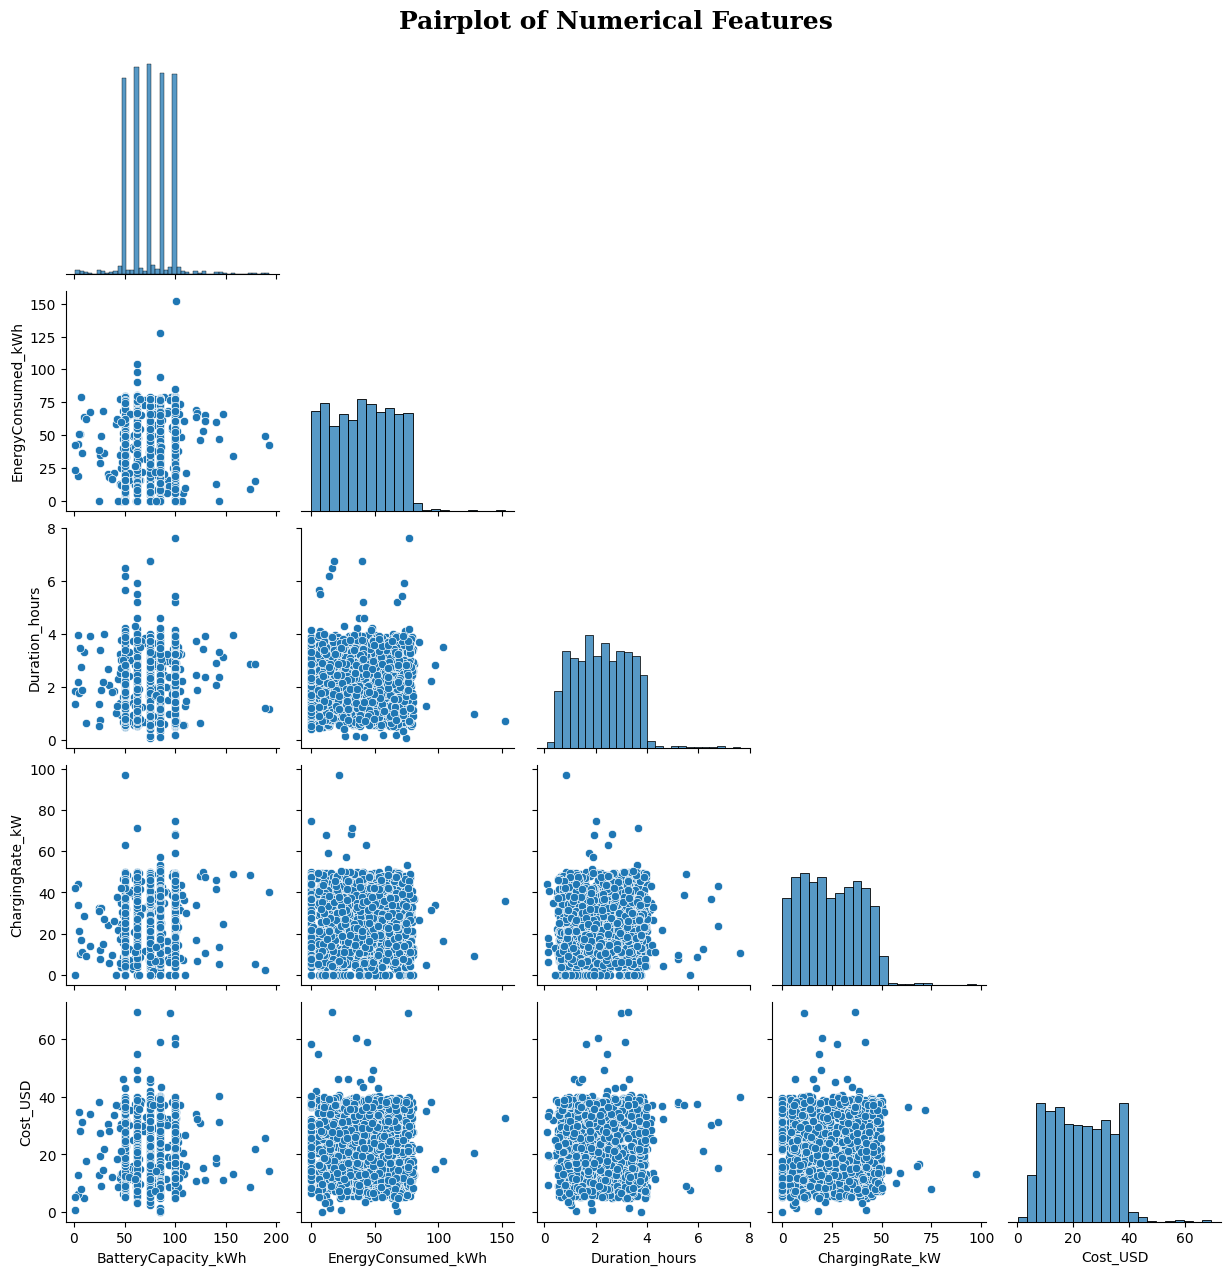

In [22]:
# 2. Pairplot for numerical features to visualize pairwise relationships
sns.pairplot(data[plot_features], palette="Blues", corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=18, fontweight='bold', fontfamily='serif')
plt.show()

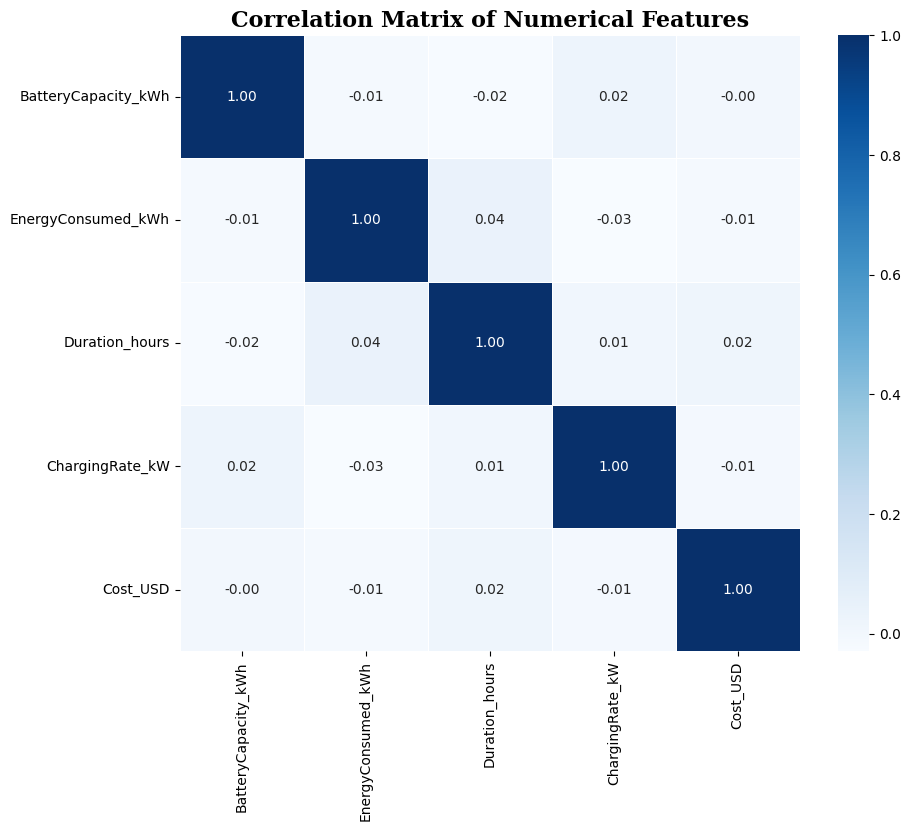

In [23]:
# 3. Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[plot_features].corr()  # Compute the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold', fontfamily='serif')
plt.show()

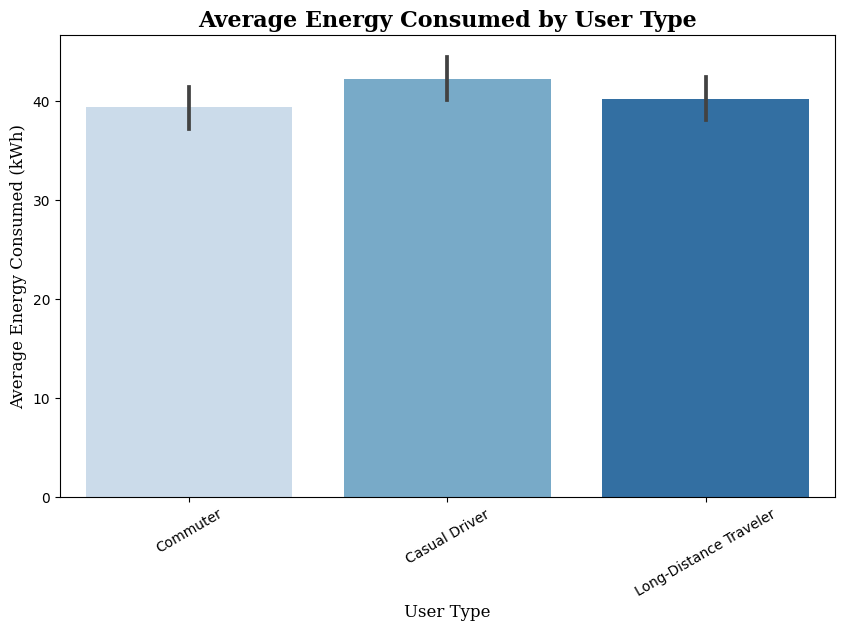

In [24]:
# 4. Barplot to analyze categorical vs numerical features
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="UserType", y="EnergyConsumed_kWh", palette="Blues")
plt.title("Average Energy Consumed by User Type", fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel("User Type", fontsize=12, fontfamily='serif')
plt.ylabel("Average Energy Consumed (kWh)", fontsize=12, fontfamily='serif')
plt.xticks(rotation=30)
plt.show()

Text(0, 0.5, 'Frequency')

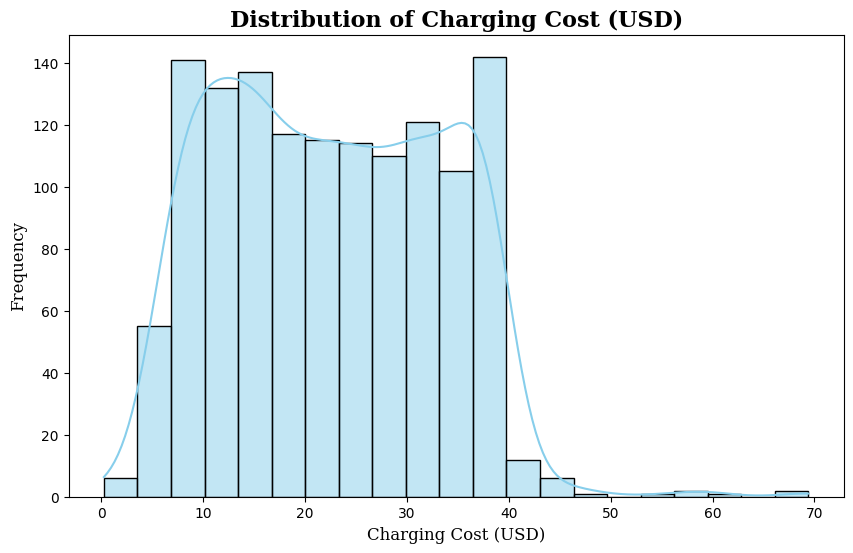

In [25]:
# 5. Annotated Insights on a specific plot (Adding annotations)
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="Cost_USD", kde=True, color="skyblue")
plt.title("Distribution of Charging Cost (USD)", fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel("Charging Cost (USD)", fontsize=12, fontfamily='serif')
plt.ylabel("Frequency", fontsize=12, fontfamily='serif')

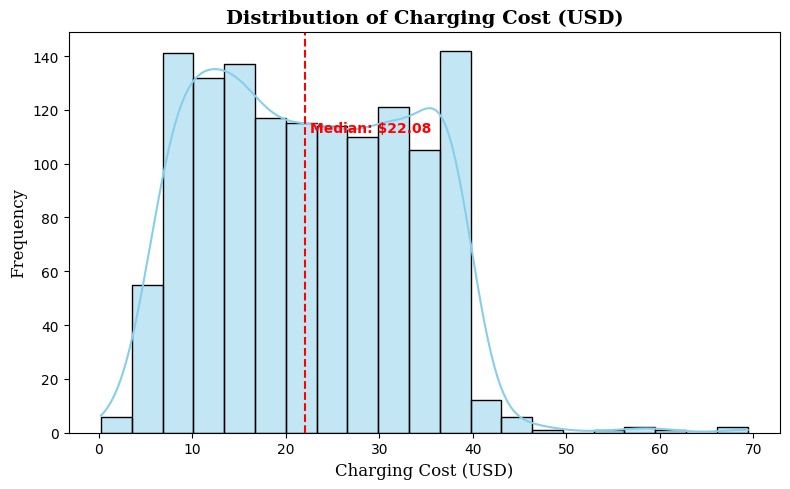

In [29]:
# Adjusted plot for Charging Cost (USD) distribution with annotations
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x="Cost_USD", kde=True, color="skyblue")
plt.title("Distribution of Charging Cost (USD)", fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel("Charging Cost (USD)", fontsize=12, fontfamily='serif')
plt.ylabel("Frequency", fontsize=12, fontfamily='serif')

# Add annotation for median cost with a smaller font size
median_cost = data["Cost_USD"].median()
plt.axvline(median_cost, color='red', linestyle='--', label=f"Median: ${median_cost:.2f}")
plt.text(median_cost + 0.5, plt.ylim()[1] * 0.75, f"Median: ${median_cost:.2f}", 
         color='red', fontsize=10, fontweight='bold')

# Tight layout and show
plt.tight_layout()
plt.show()


In [32]:
data.head()

,UserID,VehicleModel,BatteryCapacity_kWh,ChargingStationID,ChargingLocation,StartTime,EndTime,EnergyConsumed_kWh,Duration_hours,ChargingRate_kW,Cost_USD,TimeOfDay,DayOfWeek,StartChargePercent,EndChargePercent,DistanceDriven_km,Temperature_C,VehicleAge_years,ChargerType,UserType
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [35]:
# Convert StartTime and EndTime to datetime
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['EndTime'] = pd.to_datetime(data['EndTime'])
data.head()

,UserID,VehicleModel,BatteryCapacity_kWh,ChargingStationID,ChargingLocation,StartTime,EndTime,EnergyConsumed_kWh,Duration_hours,ChargingRate_kW,Cost_USD,TimeOfDay,DayOfWeek,StartChargePercent,EndChargePercent,DistanceDriven_km,Temperature_C,VehicleAge_years,ChargerType,UserType
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


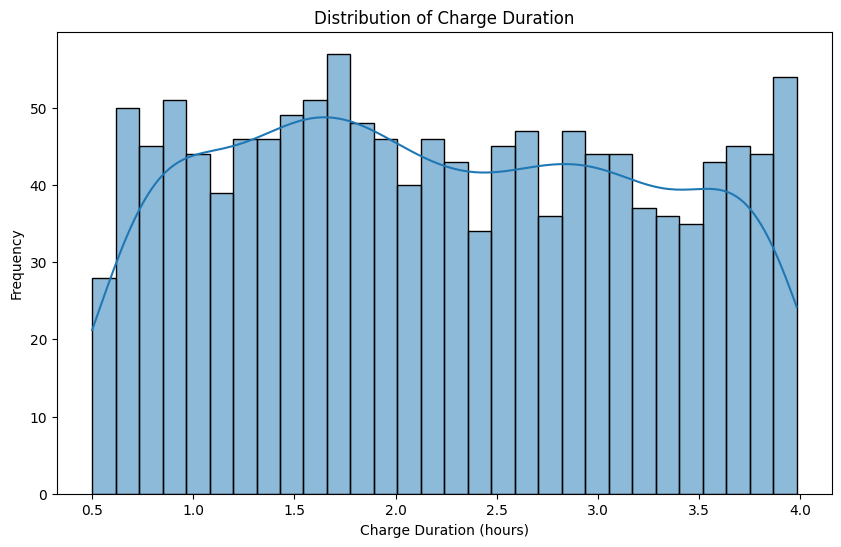

In [36]:
# Calculate sleep duration in hours
data['Charge_Duration'] = (data['EndTime'] - data['StartTime']).dt.total_seconds() / 3600

plt.figure(figsize=(10, 6))
sns.histplot(data['Charge_Duration'], kde=True, bins=30)
plt.title('Distribution of Charge Duration')
plt.xlabel('Charge Duration (hours)')
plt.ylabel('Frequency')
plt.show()

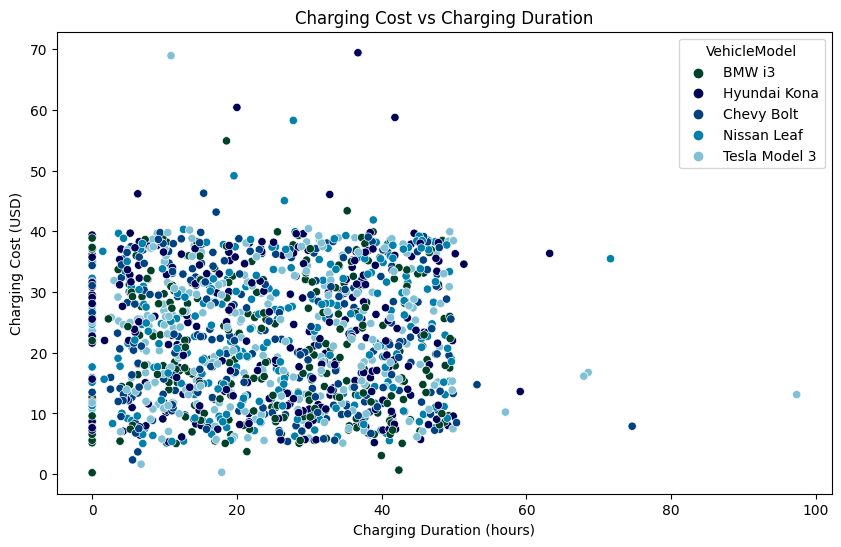

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ChargingRate_kW', y='Cost_USD',hue='VehicleModel', palette='ocean')
plt.title('Charging Cost vs Charging Duration')
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Charging Cost (USD)')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


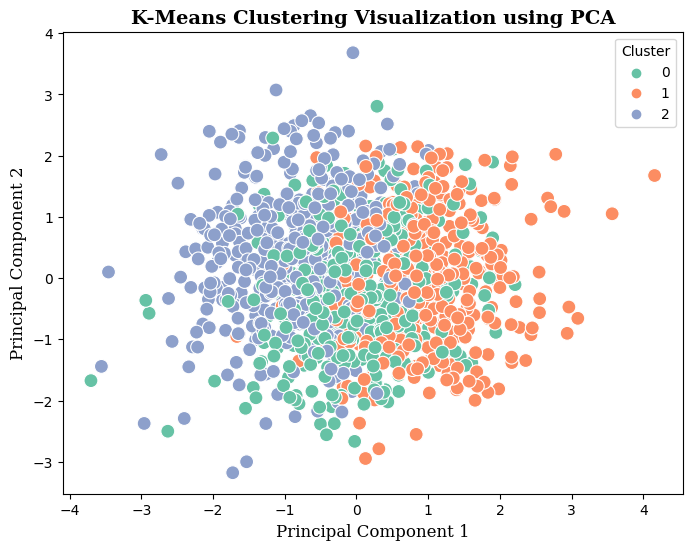

Cluster Centers (Original Scale):
   BatteryCapacity_kWh  EnergyConsumed_kWh  Charge_Duration  ChargingRate_kW  \
0            75.590804           47.602458         1.643843        20.966370   
1            70.031912           38.840465         1.595597        24.723738   
2            77.340361           35.740320         3.249932        27.824051   

    Cost_USD  Temperature_C  DistanceDriven_km  VehicleAge_years  
0  20.515043       2.487951         141.458007          3.554910  
1  23.990896      29.773151         136.354313          3.329863  
2  23.127711      14.351909         157.688208          3.896982  


In [52]:
# Import necessary libraries for clustering and data visualization
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

# Step 1: Data preparation
# We'll focus on the numeric features for clustering
numeric_features = ['BatteryCapacity_kWh', 'EnergyConsumed_kWh', 'Charge_Duration',
                    'ChargingRate_kW', 'Cost_USD', 'Temperature_C', 
                    'DistanceDriven_km', 'VehicleAge_years']

# Dropping any rows with missing values in the selected numeric columns
data_clean = data[numeric_features].dropna()

# Step 2: Data normalization
# Standardize the data so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_clean)

# Step 3: K-Means clustering
# Perform K-Means clustering with a specified number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original dataset
data_clean['Cluster'] = clusters

# Step 4: Visualizing the clusters using PCA (Principal Component Analysis)
# Reduce the dimensions of the data to 2D using PCA for easier visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame with the 2D PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Step 5: Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=100)
plt.title('K-Means Clustering Visualization using PCA', fontsize=14, fontweight='bold', fontfamily='serif')
plt.xlabel('Principal Component 1', fontsize=12, fontfamily='serif')
plt.ylabel('Principal Component 2', fontsize=12, fontfamily='serif')
plt.legend(title='Cluster')
plt.show()

# Step 6: Analyzing the cluster centers
# Print the cluster centers to analyze the characteristics of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_features)
print("Cluster Centers (Original Scale):")
print(cluster_centers_df)
